In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import jax.numpy as jnp
from jax import grad, vmap, random

In [2]:

%env JAX_PLATFORM_NAME=cpu
# If we uncomment the magic env line above, you won't
# see the error of not finding a GPU/TPU when you first call JAX (below)

env: JAX_PLATFORM_NAME=cpu


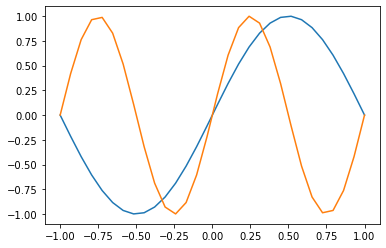

In [3]:
Xn=np.linspace(-1,1,30)
y1=np.sin(Xn*(np.pi))
y2=np.sin(Xn*(2*np.pi))
plt.plot(Xn,y1)
plt.plot(Xn,y2)

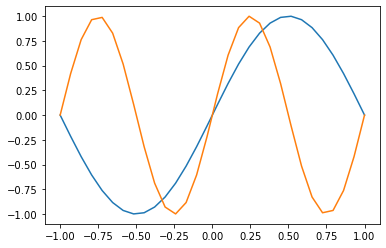

In [4]:
# The same in JAX
def wsin(w, xin):
    return jnp.array(jnp.sin(w*xin))
Xj=jnp.linspace(-1,1,30)
plt.plot(Xj, wsin(1., np.pi*Xj))
plt.plot(Xj, wsin(2., np.pi*Xj))

In [5]:
print(type(Xn), '\n', type(Xj))

<class 'numpy.ndarray'> 
 <class 'jaxlib.xla_extension.DeviceArray'>


In [6]:
d_wsin_x = grad(wsin, argnums=1)
d_wsin_w = grad(wsin, argnums=0)

In [7]:
print(wsin(1.,0.), d_wsin_x(1., 0.), d_wsin_w(1.,0.))
print(wsin(3.,0.), d_wsin_x(3., 0.), d_wsin_w(3.,0.))

0.0 1.0 0.0
0.0 3.0 0.0


In [8]:
# As before calling wsin on an array returns an array
xvals = jnp.linspace(-1,1,5)
print(xvals,'\n',wsin(1.,np.pi*xvals))

[-1.  -0.5  0.   0.5  1. ] 
 [ 8.742278e-08 -1.000000e+00  0.000000e+00  1.000000e+00 -8.742278e-08]


In [9]:
# uncomment this
# d_wsin_w(1.,xvals)

In [10]:
grad_wsin_w = vmap(d_wsin_w, in_axes=(None, 0))
grad_wsin_x = vmap(d_wsin_x, in_axes=(None, 0))
print(grad_wsin_w(1., np.pi*xvals))
print(grad_wsin_x(1., np.pi*xvals))

[ 3.1415927e+00  6.8661691e-08  0.0000000e+00 -6.8661691e-08
 -3.1415927e+00]
[-1.000000e+00 -4.371139e-08  1.000000e+00 -4.371139e-08 -1.000000e+00]


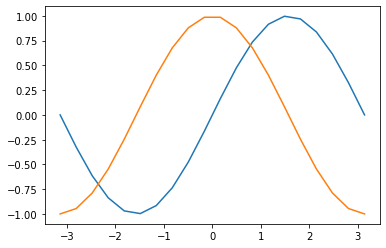

In [11]:
# Having done this, you can now evaluate the gradient on an array
# and plot the returned array of values
X_plot = np.linspace(-1,1,20)
plt.plot(np.pi*X_plot, wsin(1., np.pi*X_plot))
plt.plot(np.pi*X_plot, grad_wsin_x(1., np.pi*X_plot))

# My Turn 
* Plot d/dx sin(w x) for different values of w 
* Plot d/dw sin(w x) for different values of w

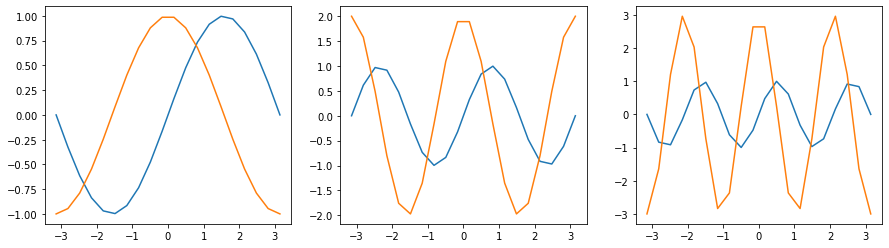

In [12]:
Ws = np.linspace(1,3,3)

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3)
i = 0
for w in Ws:
    ax[i].plot(np.pi*X_plot, wsin(w, np.pi*X_plot))
    ax[i].plot(np.pi*X_plot, grad_wsin_x(w, np.pi*X_plot))
    i += 1

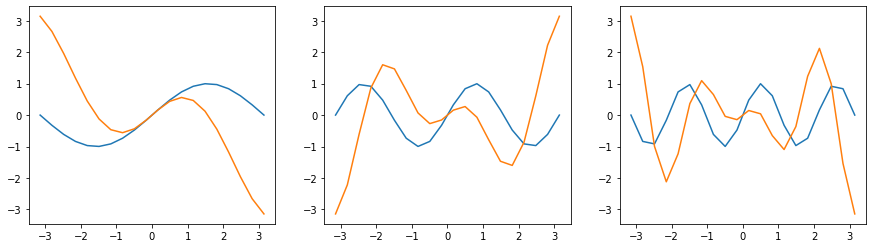

In [13]:
Ws = np.linspace(1,3,3)

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3)
i = 0
for w in Ws:
    ax[i].plot(np.pi*X_plot, wsin(w, np.pi*X_plot))
    ax[i].plot(np.pi*X_plot, grad_wsin_w(w, np.pi*X_plot))
    i += 1

In [15]:
def sigmoid(w, xin):
    return jnp.array(1/(1+jnp.exp(-w*xin)))

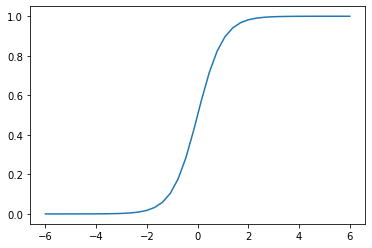

In [16]:
X1 = np.linspace(-6,6,40)
plt.plot(X1, sigmoid(2.,X1))

In [20]:
d_sigmoid_x = grad(sigmoid, argnums=1)
d_sigmoid_w = grad(sigmoid, argnums=0)

In [21]:
grad_sigmoid_w = vmap(d_sigmoid_w, in_axes=(None, 0))
grad_sigmoid_x = vmap(d_sigmoid_x, in_axes=(None, 0))

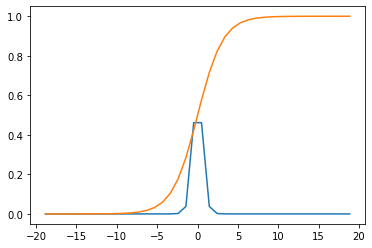

In [43]:
plt.plot(np.pi*X1, grad_sigmoid_x(w, np.pi*X1))
plt.plot(np.pi*X1, sigmoid(2., X1))

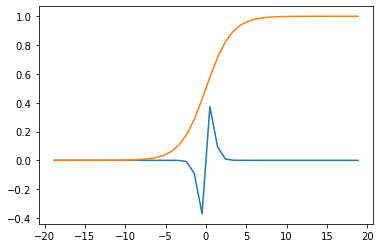

In [44]:
plt.plot(np.pi*X1, 5*grad_sigmoid_w(w, np.pi*X1))
plt.plot(np.pi*X1, sigmoid(2., X1))

In [38]:
type(X1)

numpy.ndarray

In [39]:
type(X_plot)

numpy.ndarray